## 讨论NBA球队胜率与3分球的关系

In [1]:
# 引入所需第三方库
% matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

In [2]:
!ls ./data/

advanced_basic.csv    coach_season.csv      single.csv
advanced_shooting.csv player_playoff.csv    team_playoff.csv
avg.csv               player_salary.csv     team_season.csv
coach_playoff.csv     player_season.csv     tot.csv


**首先观测数据的基本情况**

In [3]:
# 读取常规赛数据
team_season = pd.read_csv('./data/team_season.csv')

In [4]:
team_season.columns

Index(['球队', '时间', '结果', '主/客场', '比分', '投篮', '命中', '出手', '三分', '三分命中', '三分出手',
       '罚球', '罚球命中', '罚球出手', '篮板', '前场', '后场', '助攻', '抢断', '盖帽', '失误', '犯规',
       '得分'],
      dtype='object')

In [5]:
# 查看球队名称
teams = team_season['球队'].drop_duplicates()
teams

0        CHI
2494     HOU
4988     SAS
7482     DAL
9976     MEM
11190    GSW
13684    LAC
16178    SAC
18672    LAL
21166    OKC
21806    POR
24300    UTA
26794    DEN
29288    MIN
31454    TOR
33128    BOS
35621    NYK
38115    BKN
38443    PHI
40937    MIA
43185    ATL
45679    CHA
46647    WAS
48157    ORL
50323    CLE
52817    IND
55310    DET
57804    MIL
60298    NOH
61430    PHO
Name: 球队, dtype: object

In [6]:
team_season.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,罚球出手,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分
0,CHI,1985-10-25,W,主,CLE115-116CHI,0.453,43,95,0.250,1,...,41,53,21,32,29,8,8,20,33,116
1,CHI,1985-10-26,W,主,DET118-121CHI,0.460,40,87,0.667,2,...,45,46,17,29,18,6,11,20,33,121
2,CHI,1985-10-29,W,客,GSW105-111CHI,0.489,45,92,0.000,0,...,26,46,13,33,24,6,5,14,27,111
3,CHI,1985-10-31,L,客,LAC120-112CHI,0.454,44,97,0.000,0,...,28,40,17,23,22,10,9,14,28,112
4,CHI,1985-11-02,L,客,NAN118-100CHI,0.417,35,84,0.250,1,...,34,40,15,25,18,4,3,22,30,100


In [7]:
# 将比赛时间转换成所处赛季，当年6月之后的比赛均归入下一年中
def convert_time_to_season(s):
    assert type(s) == str
    date = s.split('-')
    if int(date[1]) >= 7:
        return int(date[0]) + 1
    else:
        return int(date[0])

In [8]:
# 计算赛季
team_season['赛季'] = team_season['时间'].map(convert_time_to_season)
team_season.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,赛季
0,CHI,1985-10-25,W,主,CLE115-116CHI,0.453,43,95,0.250,1,...,53,21,32,29,8,8,20,33,116,1986
1,CHI,1985-10-26,W,主,DET118-121CHI,0.460,40,87,0.667,2,...,46,17,29,18,6,11,20,33,121,1986
2,CHI,1985-10-29,W,客,GSW105-111CHI,0.489,45,92,0.000,0,...,46,13,33,24,6,5,14,27,111,1986
3,CHI,1985-10-31,L,客,LAC120-112CHI,0.454,44,97,0.000,0,...,40,17,23,22,10,9,14,28,112,1986
4,CHI,1985-11-02,L,客,NAN118-100CHI,0.417,35,84,0.250,1,...,40,15,25,18,4,3,22,30,100,1986


In [9]:
# 计算每赛季数据
three_point_seasons = team_season.groupby(team_season['赛季']).mean()
three_point_seasons

,投篮,命中,出手,三分,三分命中,三分出手,罚球,罚球命中,罚球出手,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,赛季
赛季,,,,,,,,,,,,,,,,,,,
1986,0.490742,43.457317,88.812805,0.268014,0.936585,3.264024,0.755913,23.075610,30.525000,43.650610,14.191463,29.459146,26.326220,8.806098,5.214024,17.534146,25.270732,110.926829,1986.0
1987,0.483141,42.743293,88.746951,0.273748,1.407927,4.668293,0.762535,23.123780,30.328049,43.929268,14.565244,29.364024,26.259756,8.640854,5.404268,16.567073,24.330488,110.018293,1987.0
1988,0.483193,42.296341,87.790854,0.301673,1.580488,4.993902,0.769474,22.345122,29.089634,43.498780,14.156707,29.342073,26.082317,8.448171,5.381707,16.340244,23.848171,108.518293,1988.0
1989,0.481174,42.519164,88.652729,0.301818,2.128920,6.629501,0.768296,22.385598,29.065041,44.033101,14.362369,29.670732,25.648664,9.049361,5.479094,17.023810,23.449477,109.552846,1989.0
1990,0.480907,41.581654,86.706787,0.311998,2.235419,6.704136,0.765909,22.152174,28.919406,43.177094,13.672853,29.504242,25.121421,8.519088,5.145811,15.684517,23.141039,107.550901,1990.0
1991,0.477065,41.391304,87.053022,0.312502,2.424178,7.475080,0.766934,21.603393,28.158006,43.395016,13.858431,29.536585,24.845175,8.514846,5.234358,15.497879,23.066808,106.810180,1991.0
1992,0.474583,41.113998,86.857900,0.322095,2.595440,7.781018,0.757973,20.373277,26.871156,43.633086,14.189290,29.443796,24.434252,8.528632,5.525451,15.037116,22.147402,105.196713,1992.0
1993,0.474201,40.560445,85.787381,0.327208,3.152704,9.337752,0.752142,20.909332,27.770944,43.097561,13.731177,29.366384,24.733828,8.475080,5.173383,15.407741,23.233828,105.182927,1993.0
1994,0.466414,39.225875,84.310180,0.327499,3.329268,9.990456,0.730311,19.294274,26.410923,43.055143,13.864793,29.190350,24.365854,8.737010,5.261400,15.511665,22.272534,101.075292,1994.0


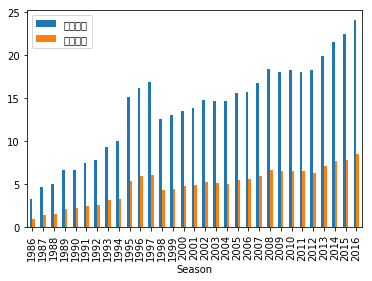

In [10]:
# 绘制每赛季三分出手与三分命中柱状图
three_point_seasons[['三分出手', '三分命中']].plot(kind='bar')
plt.xlabel('Season')

* **可以看出，NBA三分球的出手数与命中数连年上涨，近年的命中数已经接近甚至超过了早年的出手数**
* **1995-1997年出手数明显属于异常值，查阅资料后得知该三年联盟将三分线缩短**

**作为对比，我们来统计每一年的胜场排名前十的球队的三分球的出手与命中情况**

In [11]:
# 记录每个赛季的胜场前十的队伍的三分出手与命中数
three_point_attempt = []
three_point_hit = []

for year in range(1986, 2017):
    single_season = team_season[team_season['赛季'] == year]
#     获取当赛季有哪些球队
    team_single_season_mean = single_season.groupby(single_season['球队']).mean()
    team_current_season_win = []
#     统计每支球队的胜场数
    for i in range(len(team_single_season_mean)):
        team = team_single_season_mean.iloc[i].name
        team_single_season_data = single_season[single_season['球队'] == team]
        team_single_season_win = team_single_season_data['结果'].value_counts().W
        team_current_season_win.append(team_single_season_win)
#     将胜场数追加到大表，并根据胜场数从高到低排序，取前10名
    team_single_season_mean['胜场数'] = team_current_season_win
    team_single_season_mean.sort_values(by='胜场数', ascending=False, inplace=True)
    team_single_season_mean = team_single_season_mean.head(10).mean()
#     将前十的场均数据的平均数添加到外部的数据容器中
    three_point_attempt.append(team_single_season_mean['三分出手'])
    three_point_hit.append(team_single_season_mean['三分命中'])

# 将记录了最终数据的list合并为一个DataFrame，并输出
three_point_top10 = pd.DataFrame({'三分出手': three_point_attempt, '三分命中': three_point_hit}, index=np.arange(1986, 2017))
three_point_top10

,三分出手,三分命中
1986,3.626829,1.063415
1987,5.217073,1.678049
1988,4.967073,1.552439
1989,6.937805,2.258537
1990,6.643902,2.236585
1991,7.057317,2.319512
1992,7.109756,2.376829
1993,9.257317,3.217073
1994,10.357317,3.520732
1995,15.960976,5.882927


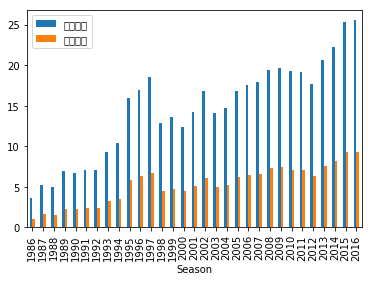

In [12]:
three_point_top10.plot(kind='bar')
plt.xlabel('Season')

**可以看出，每个赛季联盟胜场前十的队伍的三分出手与命中的分布以及绝对数量与同时期的联盟的数据基本一致**

**我们希望能够得到三分球与胜率的关系，此处，我们抽取了2016赛季的数据，绘制图表，查看球队胜率与其三分球胜率直接对比，尝试寻找两个变量之间的联系**

In [13]:
# 抽取2016赛季数据
team_season_16 = team_season[team_season['赛季'] == 2016]
team_season_16.head()

,球队,时间,结果,主/客场,比分,投篮,命中,出手,三分,三分命中,...,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,赛季
2412,CHI,2015-10-27,W,主,CLE95-97CHI,0.425,37,87,0.368,7,...,47,7,40,13,6,10,13,22,97,2016
2413,CHI,2015-10-28,W,客,BKN100-115CHI,0.538,42,78,0.500,14,...,39,5,34,20,9,3,19,24,115,2016
2414,CHI,2015-10-30,L,客,DET98-94CHI,0.405,34,84,0.318,7,...,50,8,42,18,8,8,19,24,94,2016
2415,CHI,2015-11-01,W,主,ORL87-92CHI,0.379,33,87,0.250,7,...,47,11,36,23,7,8,13,16,92,2016
2416,CHI,2015-11-03,L,客,NOH130-105CHI,0.489,44,90,0.467,14,...,33,4,29,26,5,0,12,19,105,2016


In [14]:
# 统计2016赛季每支球队的数据
team_season_data_16 = team_season_16.groupby(team_season_16['球队'])
team_season_data_16.sum()

,投篮,命中,出手,三分,三分命中,三分出手,罚球,罚球命中,罚球出手,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,赛季
球队,,,,,,,,,,,,,,,,,,,
ATL,37.606,3168,6923,28.827,815,2327,63.797,1282,1638,3450,678,2772,2100,749,488,1192,1570,8433,165312
BKN,37.222,3136,6921,28.544,531,1509,61.675,1286,1699,3478,864,2614,1829,627,331,1174,1476,8089,165312
BOS,36.091,3216,7318,27.504,717,2142,64.673,1520,1929,3683,950,2733,1981,752,348,1104,1796,8669,165312
CHA,35.995,3036,6922,29.639,873,2411,65.206,1534,1941,3604,734,2870,1778,596,438,975,1487,8479,165312
CHI,36.353,3165,7168,30.235,651,1754,64.125,1354,1720,3796,907,2889,1870,495,470,1093,1545,8335,165312
CLE,37.879,3171,6888,29.734,880,2426,61.430,1333,1783,3650,873,2777,1861,551,317,1056,1666,8555,165312
DAL,36.468,3064,6901,28.142,806,2341,65.025,1454,1831,3534,753,2781,1813,560,304,1011,1595,8388,165312
DEN,36.278,3093,7002,27.591,656,1945,63.126,1513,1974,3658,940,2718,1858,609,395,1162,1723,8355,165312
DET,36.099,3111,7089,28.211,740,2146,55.364,1399,2095,3799,1022,2777,1594,573,304,1061,1557,8361,165312


In [15]:
# 统计2016赛季每支球队的胜率
win_lose_16 = {}

for i in range(len(team_season_16)):
    match = team_season_16.iloc[i]
    team = match['球队']
    outcome = match['结果']
    if team not in win_lose_16.keys():
        win_lose_16[team] = {}
    if outcome not in win_lose_16[team].keys():
        win_lose_16[team][outcome] = 1
    else:
        win_lose_16[team][outcome] += 1

win_lose_16 = pd.DataFrame(win_lose_16).T
win_lose_16['win rate'] = win_lose_16['W'] / 82
win_lose_16.sort_values(by='win rate', ascending=False)

,L,W,win rate
GSW,9,73,0.890244
SAS,15,67,0.817073
CLE,25,57,0.695122
TOR,26,56,0.682927
OKC,27,55,0.670732
LAC,29,53,0.646341
ATL,34,48,0.585366
MIA,34,48,0.585366
BOS,34,48,0.585366
CHA,34,48,0.585366


In [16]:
# 计算2016赛季所有球队三分命中率
three_point_to_win_16 = pd.merge(team_season_data_16.sum()[['三分出手', '三分命中']], win_lose_16, left_index=True, right_index=True)
three_point_to_win_16['3P%'] = three_point_to_win_16['三分命中'] / three_point_to_win_16['三分出手']
three_point_to_win_16.rename(columns={'三分出手': '3PA', '三分命中': '3P'})
three_point_to_win_16.sort_values(by='win rate', inplace=True)

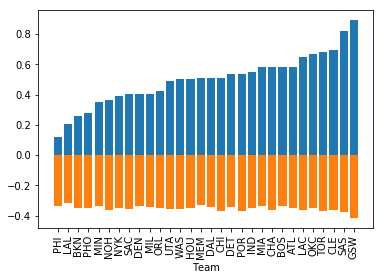

In [17]:
# 绘图，红色柱为胜率，蓝色柱为3分命中率
plt.bar(np.arange(30), three_point_to_win_16['win rate'], label='WinRate')
plt.bar(np.arange(30), -three_point_to_win_16['3P%'], label='3P%')
plt.xticks(np.arange(30), list(three_point_to_win_16.index), rotation=90)
plt.xlabel('Team')

* **除了特别突出的勇士队（三分命中率超过4成）之外，其余球队大致上区别不算特别明显**
* **三分命中率的对应比较参差不齐，难以寻找规律**

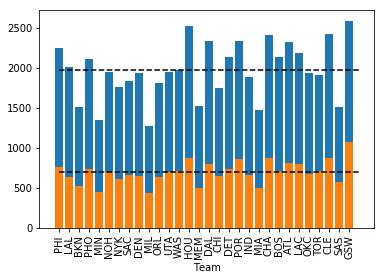

In [18]:
# 2016赛季所有球队三分出手与三分命中情况
plt.bar(np.arange(30), three_point_to_win_16['三分出手'])
plt.bar(np.arange(30), three_point_to_win_16['三分命中'])
plt.hlines(three_point_to_win_16['三分出手'].mean(), 0, 30, linestyles='dashed')
plt.hlines(three_point_to_win_16['三分命中'].mean(), 0, 30, linestyles='dashed')
plt.xticks(np.arange(30), list(three_point_to_win_16.index), rotation=90)
plt.xlabel('Team')

* **出手超过联盟平均数的球队不到一半，命中数超过联盟平均数的球队亦不到一半**
* **排名垫底的76人对出手数与命中数均超过联盟平均水平；而排名第二的马刺在两项统计上均未达到**

In [19]:
win_lose_16[win_lose_16['win rate'] > win_lose_16['win rate'].mean()]

,L,W,win rate
ATL,34,48,0.585366
BOS,34,48,0.585366
CHA,34,48,0.585366
CHI,40,42,0.512195
CLE,25,57,0.695122
DAL,40,42,0.512195
DET,38,44,0.536585
GSW,9,73,0.890244
IND,37,45,0.548780
LAC,29,53,0.646341


**由上述的单赛季的图表可以看出，直接观察胜场数与其三分命中率，这两个变量之间缺少直观的联系。我们尝试通过确定两个变量之间的相关系数来进行讨论**

In [20]:
# 记录相关系数的list
coefficiency = []

for year in range(1986, 2017):
    
    win_count = []
    win_index = []
#     获取单赛季数据
    single_season = team_season[team_season['赛季'] == year]
    team_sum = single_season.groupby(single_season['球队']).sum()
#     计算当赛季联盟的三分命中率
    team_sum['3p_Rate'] = team_sum['三分命中'] / team_sum['三分出手']
#     按三分命中率从高到低排列
    team_sum.sort_values(by='3p_Rate', ascending=False, inplace=True)
#     获取单赛季中每支球队数据
    for team in range(len(team_sum)):
        team_name = team_sum.iloc[team].name
        current_team_data = single_season[single_season['球队'] == team_name]
#         记录当前赛季所有的胜场数
        win_count.append(current_team_data['结果'].value_counts().W)
#     胜场数由高到低排列
    win_count.sort()
    win_count.reverse()
#     找出每支球队按胜场数排列的排名
    for team in range(len(team_sum)):
        team_name = team_sum.iloc[team].name
        current_team_data = single_season[single_season['球队'] == team_name]
        current_win = current_team_data['结果'].value_counts().W
        win_index.append(win_count.index(current_win))
    print(win_index)
#     添加胜场排名和3分命中排名到大表中
    team_sum['Win_Rank'] = win_index
    team_sum['3p_Rate_Rank'] = np.arange(len(team_sum))
    
#     计算二者相关系数
    coefficiency.append(team_sum['Win_Rank'].corr(team_sum['3p_Rate_Rank']))

coefficiency

[0, 19, 1, 17, 2, 8, 15, 7, 15, 13, 4, 10, 6, 12, 3, 11, 13, 9, 5, 18]
[0, 1, 3, 18, 5, 9, 2, 8, 11, 17, 6, 9, 13, 12, 7, 16, 14, 15, 4, 19]
[1, 10, 2, 12, 16, 10, 15, 14, 17, 8, 12, 4, 6, 0, 4, 18, 2, 19, 9, 6]
[17, 1, 3, 1, 11, 4, 14, 16, 8, 20, 9, 7, 10, 15, 12, 0, 6, 4, 13, 18, 18]
[13, 13, 4, 0, 4, 7, 12, 1, 19, 10, 1, 6, 17, 9, 11, 15, 15, 21, 21, 8, 20, 18, 3]
[0, 20, 1, 16, 9, 10, 15, 13, 14, 12, 6, 19, 7, 4, 10, 3, 2, 21, 8, 18, 22, 4, 16]
[5, 17, 1, 13, 18, 3, 1, 12, 14, 20, 16, 3, 6, 21, 22, 8, 14, 6, 0, 19, 9, 10, 11]
[4, 2, 0, 3, 10, 9, 15, 19, 17, 6, 22, 18, 20, 5, 10, 13, 1, 8, 15, 14, 21, 7, 10]
[9, 9, 4, 9, 16, 4, 1, 7, 19, 7, 12, 18, 0, 3, 19, 19, 1, 6, 22, 17, 14, 15, 12]
[10, 5, 20, 1, 0, 7, 3, 17, 2, 4, 15, 7, 16, 9, 12, 18, 6, 13, 11, 19, 14, 22, 21]
[9, 0, 2, 14, 12, 1, 7, 7, 5, 15, 3, 17, 18, 6, 19, 9, 22, 11, 4, 16, 23, 21, 13, 19]
[15, 7, 13, 10, 0, 21, 1, 11, 5, 3, 2, 3, 17, 5, 8, 14, 17, 16, 23, 9, 11, 19, 22, 20]
[3, 8, 0, 22, 20, 4, 6, 16, 2, 19, 4, 10, 13

[0.13438764241385018,
 0.5421256442043203,
 -0.0066637513418581077,
 0.25023614562475377,
 0.40793918794800532,
 0.14605693040920625,
 0.07090814932808516,
 0.30070179814612163,
 0.32742818828154618,
 0.54555894618601575,
 0.58938304692714349,
 0.45437218683666064,
 0.32606573528687655,
 0.43373767942441283,
 0.3543377493025881,
 0.36095286774628776,
 0.50898003600087138,
 0.41203012024857338,
 0.37370499859620587,
 0.42117213477002641,
 0.23562563337595555,
 0.21533929075495267,
 0.48777262748578754,
 0.51219672210431055,
 0.45203765922054784,
 0.37820158435673273,
 0.46499834868234874,
 0.45923074393662044,
 0.43602426686299312,
 0.66928375410800856,
 0.43594056554382016]

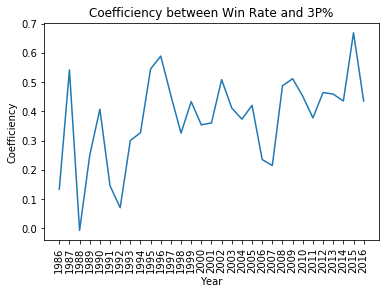

In [21]:
plt.plot(coefficiency)
plt.xticks(np.arange(31), np.arange(1986, 2017), rotation=90)
plt.xlabel('Year')
plt.ylabel('Coefficiency')
plt.title('Coefficiency between Win Rate and 3P%')
plt.show()

* **以上的模型观点：考察一个赛季中，每一支球队其三分球命中率排名与其战绩排名的相关系数**
* **可以看到的是，该模型中近年的相关系数较大，这点事符合预期的**
* **95-97年的异常值也被该模型反应了出来，这是可以理解的：当三分球占比升高，三分球的水平当然会对战绩产生更大的影响**
* **80年代及90年代初的值可认为是异常值，是由于当时的三分球占比过低，对战绩几乎不能产生影响**
* **近年来两项指标的相关系数稳定于0.5左右，2015年逼近0.7，即【高度相关】**